In [18]:
# 필요한 패키지 설치
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (5,3)


In [19]:
import matplotlib.font_manager as fm

# 한글 폰트 지원
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
plt.rc('font', family=font_name)

In [20]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
# df = pd.read_csv("../resource/W3/heart_2020_cleaned.csv")
df = pd.read_csv("../resource/W3/heart_2020_cleaned_1.csv")

# 데이터 샘플 확인
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [21]:
# BMI 컬럼의 분포 확인

df['BMI'].describe()

count    11054.000000
mean        28.591835
std          6.439439
min         12.480000
25%         24.210000
50%         27.440000
75%         31.890000
max         83.000000
Name: BMI, dtype: float64

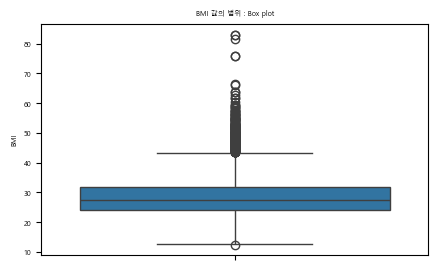

In [22]:
# BMI 컬럼의 박스플롯 시각화를 통한 이상치 확인

plt.figure(figsize = (5, 3))
sns.boxplot(y = 'BMI', data = df)
plt.title("BMI 값의 범위 : Box plot", fontsize=5)
plt.yticks(fontsize=5)
plt.ylabel("BMI", fontsize=5)
plt.show()

In [23]:
# BMI 컬럼의 이상치 제거 (IQR*3)

# Q!, Q3 범위 정의
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1    #IQR 범위. 
rev_range = 3  # 제거 범위 조절 변수 설정

# 이상치 범위 설정
filter = (df['BMI'] >= Q1 - rev_range * IQR) & (df['BMI'] <= Q3 + rev_range *IQR)
df_rmv = df.loc[filter]
print(df['BMI'].describe())
print(df_rmv['BMI'].describe())

count    11054.000000
mean        28.591835
std          6.439439
min         12.480000
25%         24.210000
50%         27.440000
75%         31.890000
max         83.000000
Name: BMI, dtype: float64
count    11021.000000
mean        28.491425
std          6.165777
min         12.480000
25%         24.210000
50%         27.440000
75%         31.780000
max         54.930000
Name: BMI, dtype: float64


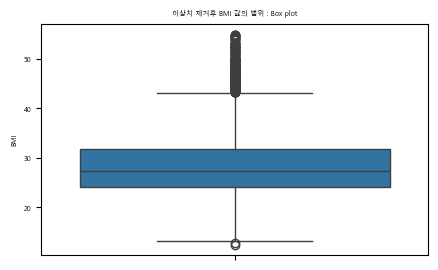

In [24]:
# 이상치 제거 후 박스플롯 시각화

plt.figure(figsize = (5, 3))
sns.boxplot(y = 'BMI', data = df_rmv)
plt.title("이상치 제거후 BMI 값의 범위 : Box plot", fontsize=5)
plt.yticks(fontsize=5)
plt.ylabel("BMI", fontsize=5)
plt.show()

In [25]:
# 이상치 IQR*3 값으로 대치

# 이상치 대치 함수 설정
def replace_outlier(value):
    Q1 = df['BMI'].quantile(0.25)
    Q3 = df['BMI'].quantile(0.75)
    IQR = Q3 - Q1    #IQR 범위. 
    rev_range = 3  # 제거 범위 조절 변수 설정

    if ((value < (Q1 - rev_range * IQR))): 
        value = Q1 - rev_range * IQR
    if ((value > (Q3 + rev_range * IQR))): 
        value = Q3 + rev_range * IQR
#         value = df['BMI'].median() # 중앙값 대치
    return value
df['BMI'] = df['BMI'].apply(replace_outlier)

print(df['BMI'].describe())

count    11054.000000
mean        28.570353
std          6.323291
min         12.480000
25%         24.210000
50%         27.440000
75%         31.890000
max         54.930000
Name: BMI, dtype: float64


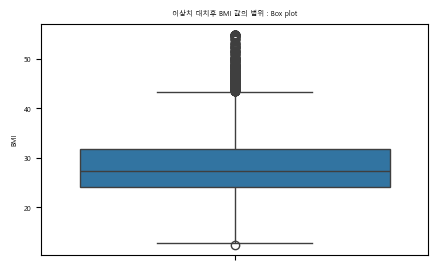

In [26]:
# 이상치 대치 후 박스플롯 시각화

plt.figure(figsize = (5, 3))
sns.boxplot(y = 'BMI', data = df)
plt.title("이상치 대치후 BMI 값의 범위 : Box plot", fontsize=5)
plt.yticks(fontsize=5)
plt.ylabel("BMI", fontsize=5)
plt.show()